# Analysis Code for 2-Point Correlator

## Preparation

In [1]:
%pip install numpy scipy iminuit matplotlib scienceplots

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
from matplotlib import ticker
import scienceplots

In [3]:
tsize = 64
cutoff = 2.1753
homePath = os.getenv("HOME")
codeRoot = "{}/ccbar".format(homePath)

## Effective mass

In [4]:
path = f"{homePath}/lqcd/ccbar:analysis/fig/effmass"
if not os.path.exists(path):
    os.makedirs(path)

In [5]:
errbar_plot_style1 = {
    "fmt": "D",
    "color": "xkcd:primary blue",
    "markersize": 4,
    "markeredgewidth": 0.5,
    "linewidth": 0.5,
    "fillstyle": "none",
}

errbar_plot_style2 = {
    "fmt": "s",
    "color": "xkcd:bright red",
    "markersize": 4,
    "markeredgewidth": 0.5,
    "linewidth": 0.5,
    "fillstyle": "none",
}

legend_style = {"loc": 8, "handletextpad": 0.5, "labelspacing": 0.3, "fontsize": 12}

### Figure

#### Read data

In [6]:
# Channel
channel = ["ps", "v", "s", "av", "t"]

emass_c, emass_l = [[] for _ in range(2)]  # Read data files
for i in range(5):
    emass_c.append(
        np.loadtxt("{}/result/c2pt/effmass/exp.{}.txt".format(codeRoot, channel[i]))
    )
    emass_l.append(
        np.loadtxt("{}/result/l2pt/effmass/exp.{}.txt".format(codeRoot, channel[i]))
    )

#### PS

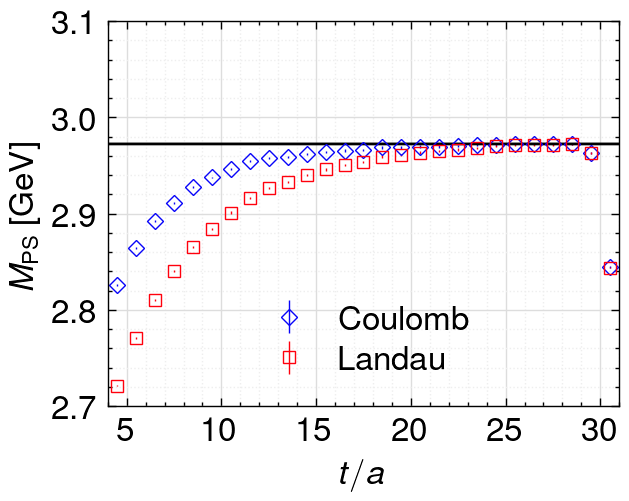

In [7]:
plt.style.use(["science", "nature"])
fig, ax = plt.subplots()

index = np.arange(0, tsize, 1)
ax.errorbar(
    index + 0.5,
    emass_c[0][:, 1] * cutoff,
    emass_c[0][:, 2] * cutoff,
    label="Coulomb",
    **errbar_plot_style1,
)
ax.errorbar(
    index + 0.5,
    emass_l[0][:, 1] * cutoff,
    emass_l[0][:, 2] * cutoff,
    label="Landau",
    **errbar_plot_style2,
)
x_fit = np.arange(0, 32, 0.01)
y_fit = np.full(x_fit.shape, 2.9725)
ax.plot(
    x_fit,
    y_fit,
    linewidth=1,
    color="black",
    # label="fit",
)

# Set grid (reserved)
ax.grid(which="major", color="#DDDDDD", linewidth=0.5)
ax.grid(which="minor", color="#EEEEEE", linestyle=":", linewidth=0.5)

ax.legend(**legend_style)

ax.set_xlabel(r"$t/a$", fontsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xlim(4, 31)

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.set_ylabel(r"$M_{\rm PS}\ [{\rm GeV}]$", fontsize=12)
ax.set_ylim(2.7, 3.1)

ax.tick_params(labelsize=12)

fig.savefig(f"{path}/gauge_ps_wfit(article).eps", format="eps", dpi=600)
plt.show()
plt.close()

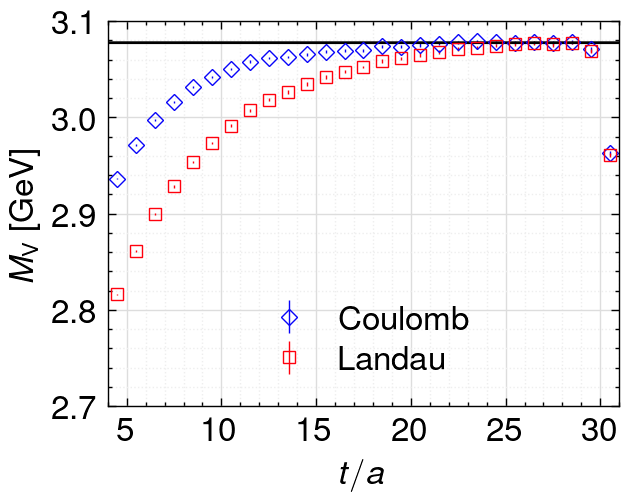

In [8]:
plt.style.use(["science", "nature"])
fig, ax = plt.subplots()

index = np.arange(0, tsize, 1)
ax.errorbar(
    index + 0.5,
    emass_c[1][:, 1] * cutoff,
    emass_c[1][:, 2] * cutoff,
    label="Coulomb",
    **errbar_plot_style1,
)
ax.errorbar(
    index + 0.5,
    emass_l[1][:, 1] * cutoff,
    emass_l[1][:, 2] * cutoff,
    label="Landau",
    **errbar_plot_style2,
)
x_fit = np.arange(0, 32, 0.01)
y_fit = np.full(x_fit.shape, 3.0777)
ax.plot(
    x_fit,
    y_fit,
    linewidth=1,
    color="black",
    # label="fit",
)

# Set grid (reserved)
ax.grid(which="major", color="#DDDDDD", linewidth=0.5)
ax.grid(which="minor", color="#EEEEEE", linestyle=":", linewidth=0.5)

ax.legend(**legend_style)

ax.set_xlabel(r"$t/a$", fontsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xlim(4, 31)

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.set_ylabel(r"$M_{\rm V}\ [{\rm GeV}]$", fontsize=12)
ax.set_ylim(2.7, 3.1)

ax.tick_params(labelsize=12)

fig.savefig(f"{path}/gauge_v_wfit(article).eps", format="eps", dpi=600)
plt.show()
plt.close()